Q1. Suppose you have a jar with 4 jelly beans: 2 are strawberry-flavored, 1 is blueberry-flavored, and 1 is cinnamon-flavored. You draw one jelly bean at random from the jar.

    a. What is the sample space for this experiment?

    b. We define event A as the jelly bean drawn is strawberry-flavored and event B as The jelly bean drawn is not cinnamon-flavored. What are the probabilities of events A and B?

    c. Are events A and B mutually exclusive? Why or why not?


In [ ]:
#Ans a. {Strawberry1, Strawberry2, Blueberry, Cinnamon}

#Ans b. P(Strawberry) = 2/4 = 0.5
       #P(not Cinnamon) = 1-1/4 = 0.75

#Ans c. Events are mutually exclusive if they cannot occur at the same time, meaning their intersection is the empty set (they have no outcomes in common). In this question, Events A and B have 2 strawberry flavoured bean in common. So, they are not mutually exclusive.

 Q2. Previously, we defined a **Python function P** to compute the probability of an event using the naive definition of probability. Generalize that function to compute the probability of events when they are
 not all equally likely. Use this new function to compute the probability of events A and B from the previous exercise.

 Hint: you can pass a third argument with the probability of each event.

In [ ]:
def P(A,S,p):
  if not set(A).issubset(set(S)):
    return 0
  ps=0
  for event in A:
    ps=ps+p.get(event,0)
  return ps

A={'S'}
B={'S','B'}
S={'S','B','C'}

p={'S':0.50,'B':0.25,'C':0.25}
print("Probability of event A is", P(A,S,p))
print("Probability of event B is",P(B,S,p))

Probability of event A is 0.5
Probability of event B is 0.75


Q3.  Use PreliZ to explore different parameters for the Gaussian distributions. Use the methods `plot_pdf`, `plot_cdf`, and `plot_interactive`. We discussed the probability mass/density functions and the cumulative density function. But there are other ways to represent functions like the percentile point function ppf. Using the `plot_ppf` method of PreliZ, plot the percentile point function for the BetaBinomial and Gaussian distributions. Can you explain how the ppf is related to the cdf and pmf/pdf?

In [ ]:
!pip install pymc==5.8.0 arviz==0.16.1 bambi==0.13.0 pymc-bart==0.5.2 kulprit==0.0.1 preliz==0.3.6 nutpie==0.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.4/468.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 63.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: pytensor
    Found existing installation: pytensor 2.18.6
    Uninstalling pytensor-2.18.6:
      Successfully uninstalled pytensor-2.18.6
  Attempting uninstall: arviz
    Found exist

In [ ]:
!pip install plotly

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'


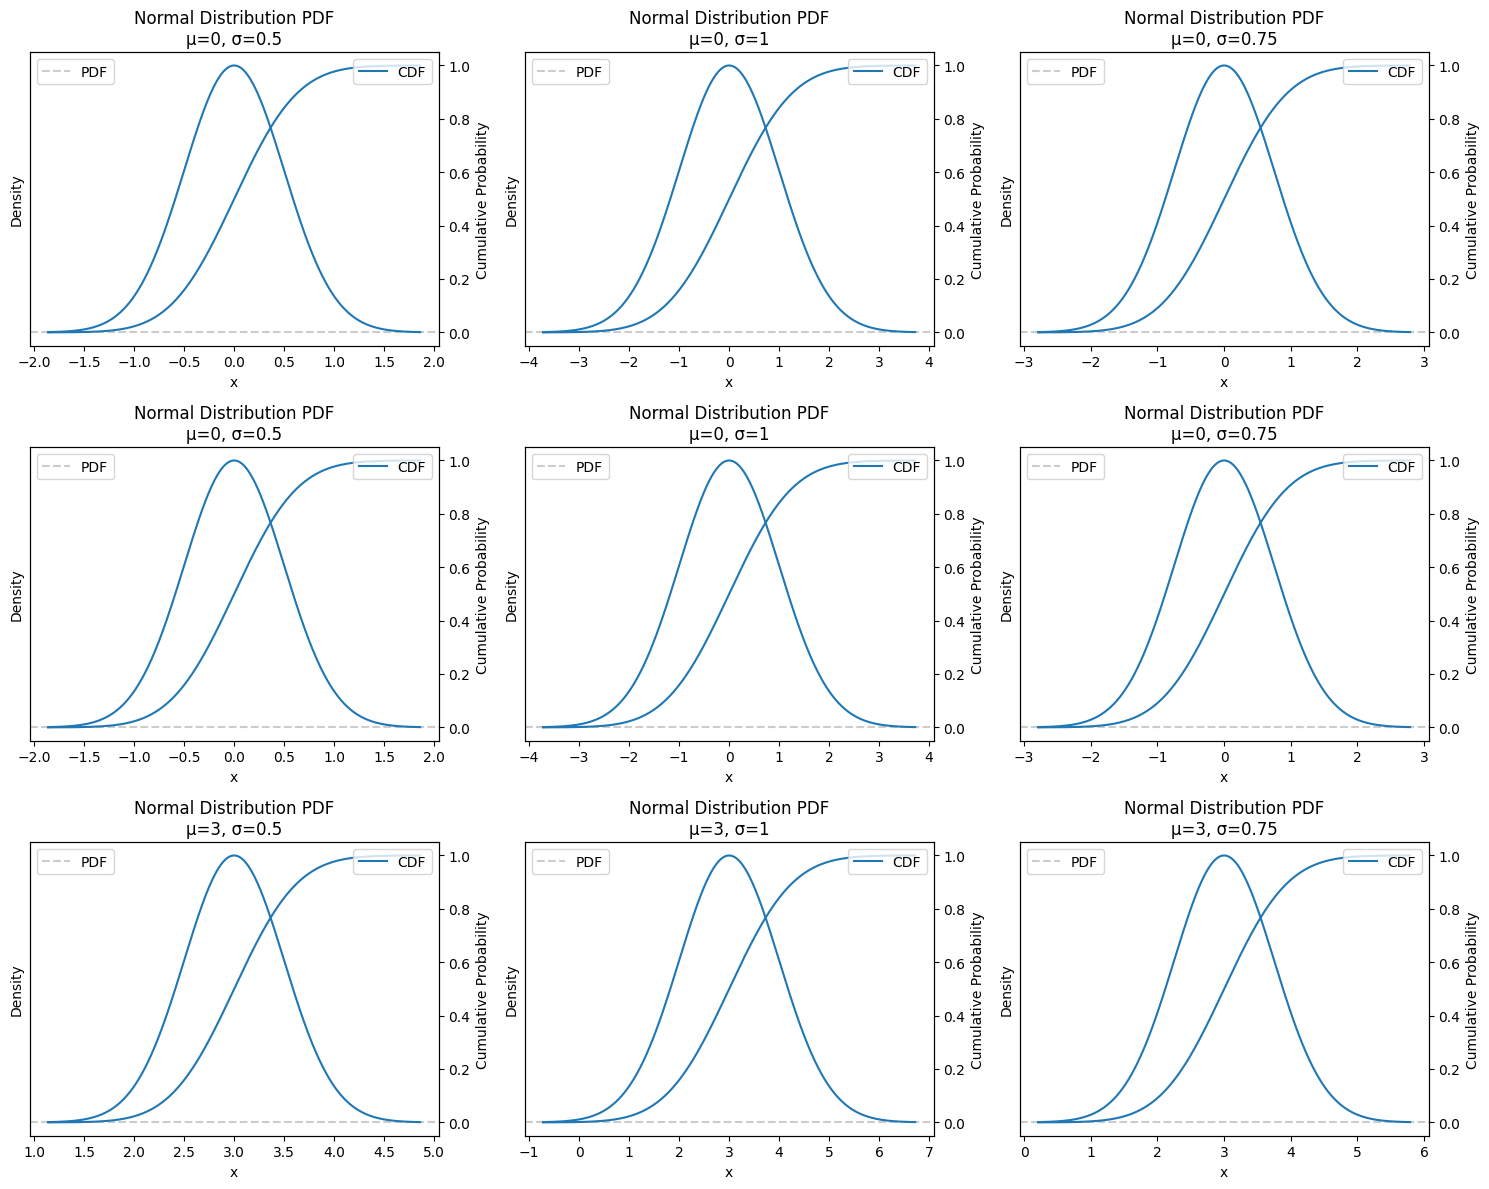

Interactive plot for μ=0, σ=0.5
Interactive plot for μ=0, σ=1
Interactive plot for μ=0, σ=0.75
Interactive plot for μ=0, σ=0.5
Interactive plot for μ=0, σ=1
Interactive plot for μ=0, σ=0.75
Interactive plot for μ=3, σ=0.5
Interactive plot for μ=3, σ=1
Interactive plot for μ=3, σ=0.75


In [ ]:
#Implementing different methods using Preliz:
import preliz as pz
import matplotlib.pyplot as plt

m = [0, 0, 3]
s = [0.5, 1, 0.75]
fig, axs = plt.subplots(len(m), len(s), figsize=(15, 12))

for i_idx, i in enumerate(m):
    for j_idx, j in enumerate(s):
        gaussian_dist = pz.Normal(mu=i, sigma=j)

        # Plotting PDF
        ax_pdf = axs[i_idx, j_idx]
        gaussian_dist.plot_pdf(ax=ax_pdf)
        ax_pdf.set_title(f'Normal Distribution PDF\nμ={i}, σ={j}')
        ax_pdf.set_xlabel('x')
        ax_pdf.set_ylabel('Density')

        # Plotting CDF
        ax_cdf = ax_pdf.twinx()
        gaussian_dist.plot_cdf(ax=ax_cdf)
        ax_cdf.set_ylabel('Cumulative Probability')

        ax_pdf.legend(['PDF'], loc='upper left')
        ax_cdf.legend(['CDF'], loc='upper right')

plt.tight_layout()
plt.show()




#Implementing plot_interactive():
for i in m:
    for j in s:
        gaussian_dist = pz.Normal(mu=i, sigma=j)
        print(f'Interactive plot for μ={i}, σ={j}')
        gaussian_dist.plot_interactive()

Interactive PPF plot for beta binomial distribution


<Axes: >

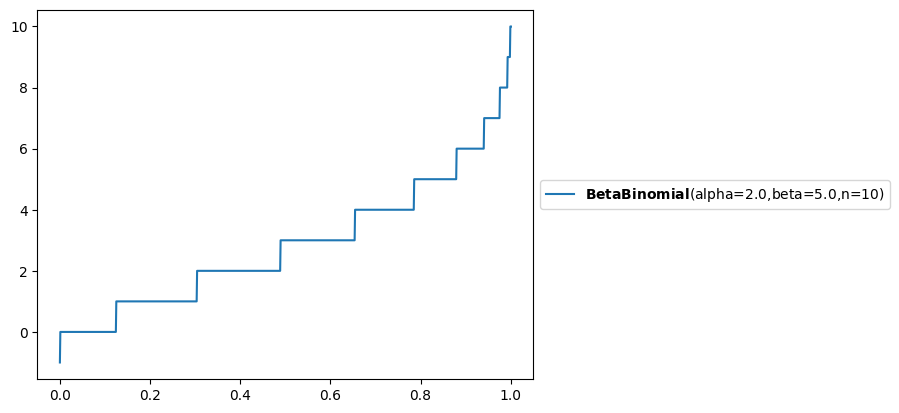

In [ ]:
#Implementing ppf for betabinomial distribution with 1 set of parameters!!

import preliz as pz
import matplotlib.pyplot as plt

betabino_dist = pz.BetaBinomial(alpha=2,beta=5,n=10)
print(f'Interactive PPF plot for beta binomial distribution')
betabino_dist.plot_ppf()


Interactive PPF plot for beta binomial distribution


<Axes: >

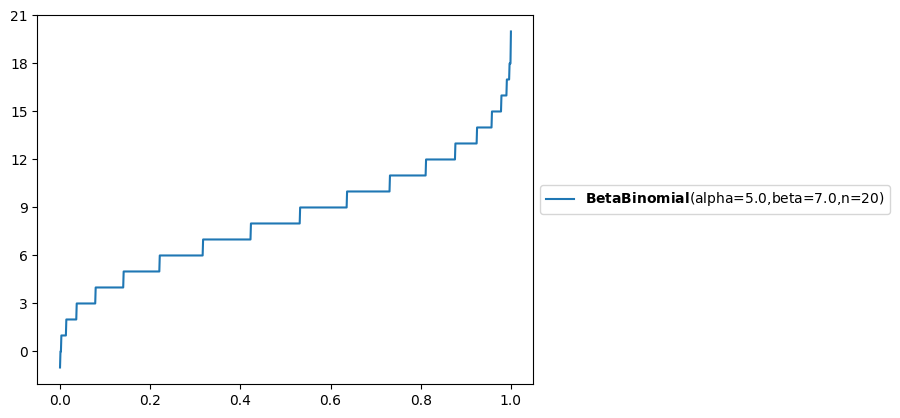

In [ ]:
#Implementing ppf for betabinomial distribution with another set of parameters!!

import preliz as pz
import matplotlib.pyplot as plt

betabino_dist = pz.BetaBinomial(alpha=5,beta=7,n=20)
print(f'Interactive PPF plot for beta binomial distribution')
betabino_dist.plot_ppf()

Interactive PPF plot for mu=0, sigma=0.5
Interactive PPF plot for mu=0, sigma=1
Interactive PPF plot for mu=0, sigma=0.75
Interactive PPF plot for mu=0, sigma=0.5
Interactive PPF plot for mu=0, sigma=1
Interactive PPF plot for mu=0, sigma=0.75
Interactive PPF plot for mu=3, sigma=0.5
Interactive PPF plot for mu=3, sigma=1
Interactive PPF plot for mu=3, sigma=0.75


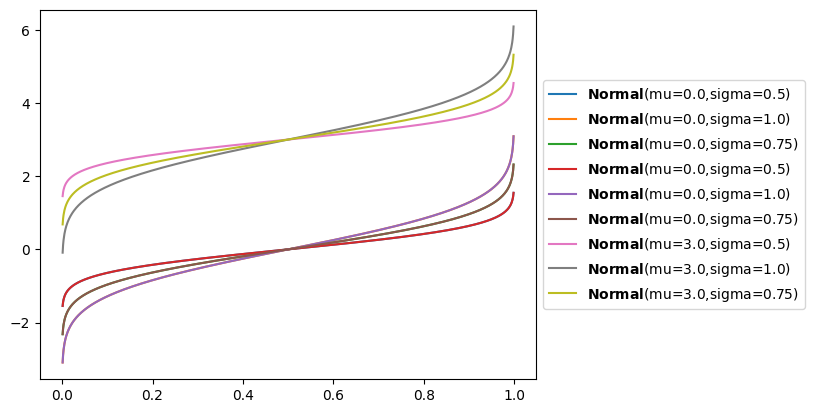

In [ ]:
#Implementing ppf for gaussian distribution for above nine sets of parameters of mu and sigma!!

import preliz as pz
import matplotlib.pyplot as plt

m = [0, 0, 3]
s = [0.5, 1, 0.75]
for i in m:
    for j in s:
        gaussian_dist = pz.Normal(mu=i, sigma=j)
        print(f'Interactive PPF plot for mu={i}, sigma={j}')
        gaussian_dist.plot_ppf()


In [ ]:
#Relationships between (PPF AND CDF) AND (PPF AND PMF/PDF):

#1) PPF and CDF- The PPF is the inverse function of CDF.While CDF gives the probability of values less than or equal to x, PPF gives values coressponding to certain cumulative probability value.

#2) PPF and PMF/PDF- Since we know that CDF is the cumulative sum of probabilities of PMF/PDF and also, the PPF is inverse of CDF hence, PPF is related to PMF/PDF somewhat through CDF.

#We can understand that visually through the examples of Gaussian function in which the PDF represents the bell shape of the curve, the CDF represents the S shape of the curve and the PPF represents the inverse function of CDF(somewhat inverted S shape)!

Q4. Use PreliZ to compute the moments for the SkewNormal distribution for a different combination of parameters. Generate random samples of different sizes,
like 10, 100, and 1,000, and see if you can recover the values of the first two moments (mean and variance) from the samples. Report your obervations.

In [ ]:
import preliz as pz
import numpy as np
import pandas as pd
from scipy.stats import skewnorm

def compute_sample_moments(samples):
    sample_mean = np.mean(samples)
    sample_variance = np.var(samples, ddof=1)
    return sample_mean, sample_variance

def theoretical_moments(mu, sigma, alpha):
    delta = alpha / np.sqrt(1 + alpha**2)
    theoretical_mean = mu + sigma * delta * np.sqrt(2 / np.pi)
    theoretical_variance = sigma**2 * (1 - (2 * delta**2 / np.pi))
    return theoretical_mean, theoretical_variance

# Parameters for the SkewNormal distribution
parameters = [
    {'mu': 0, 'sigma': 1, 'alpha': 0},   # Standard normal
    {'mu': 0, 'sigma': 1, 'alpha': 5},   # Positive skew
    {'mu': 0, 'sigma': 1, 'alpha': -5},  # Negative skew
]

# Sample sizes
sample_sizes = [10, 100, 1000]

results = []

for param in parameters:

    theoretical_mean, theoretical_variance = theoretical_moments(param['mu'], param['sigma'], param['alpha'])

    for size in sample_sizes:
        samples = skewnorm.rvs(a=param['alpha'], loc=param['mu'], scale=param['sigma'], size=size)

        sample_mean, sample_variance = compute_sample_moments(samples)

        results.append({
            'Mu': param['mu'],
            'Sigma': param['sigma'],
            'Alpha': param['alpha'],
            'Sample Size': size,
            'Sample Mean': sample_mean,
            'Sample Variance': sample_variance,
            'Theoretical Mean': theoretical_mean,
            'Theoretical Variance': theoretical_variance
        })

results_df = pd.DataFrame(results)

# Display results
print(results_df)

# Observations
for index, row in results_df.iterrows():
    print(f"Parameters: mu={row['Mu']}, sigma={row['Sigma']}, alpha={row['Alpha']}")
    print(f"Sample Size: {row['Sample Size']}")
    print(f"Sample Mean: {row['Sample Mean']}, Sample Variance: {row['Sample Variance']}")
    print(f"Theoretical Mean: {row['Theoretical Mean']}, Theoretical Variance: {row['Theoretical Variance']}\n")


   Mu  Sigma  Alpha  Sample Size  Sample Mean  Sample Variance  \
0   0      1      0           10     0.026518         1.572477   
1   0      1      0          100     0.064085         1.289341   
2   0      1      0         1000     0.002823         1.070779   
3   0      1      5           10     0.835743         0.416233   
4   0      1      5          100     0.807391         0.386440   
5   0      1      5         1000     0.802468         0.414896   
6   0      1     -5           10    -0.987229         1.142088   
7   0      1     -5          100    -0.837462         0.395689   
8   0      1     -5         1000    -0.798331         0.409656   

   Theoretical Mean  Theoretical Variance  
0           0.00000              1.000000  
1           0.00000              1.000000  
2           0.00000              1.000000  
3           0.78239              0.387866  
4           0.78239              0.387866  
5           0.78239              0.387866  
6          -0.78239            

In [ ]:
#Observations:

#What to expect:
#1)Theoretical moments(mean and variance) should be computed correctly.
#2)Variance should always be non negative.
#3)Sample mean and variance are computed from generated samples.
#4)Sample moment values must approximate to theoritical moment values as the sample size increases.

#Analysis of Observations:
#1)For small sample size(n=10):
    #Sample moments may vary significantly from theoretical values due to high variability.

#2)For medium sample size(n=100):
    #Sample moment values start to converge to theoritical ones.

#3)For large sample size(n=1000):
    #Sample moment must be very close to theoritical moment values, demonstrating the law of large numbers.

